In [1]:
import os
import cv2
import pafy
import math
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from collections import deque
import matplotlib.pyplot as plt
 
from moviepy.editor import *
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

2022-11-09 23:26:28.539069: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-09 23:26:28.623749: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-09 23:26:28.961123: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/subham/.virtualenvs/obscene/lib/python3.7/site-packages/cv2/../../lib64:/usr/local/cuda-11.1/lib64
2022-11-09 23:26:28.961168: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load 

In [2]:
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)
seed_constant = 27
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [4]:
# Downlaod the UCF50 Dataset
!wget --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
 
#Extract the Dataset
!unrar x UCF50.rar

--2022-11-09 23:27:24--  https://www.crcv.ucf.edu/data/UCF50.rar
Resolving www.crcv.ucf.edu (www.crcv.ucf.edu)... 132.170.214.127
Connecting to www.crcv.ucf.edu (www.crcv.ucf.edu)|132.170.214.127|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 3233554570 (3.0G) [application/rar]
Saving to: ‘UCF50.rar’

UCF50.rar           100%[===================>]   3.01G  8.46MB/s    in 6m 46s  

2022-11-09 23:34:11 (7.60 MB/s) - ‘UCF50.rar’ saved [3233554570/3233554570]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from UCF50.rar

Creating    UCF50                                                     OK
Creating    UCF50/BaseballPitch                                       OK
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g01_c01.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g01_c02.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g01_

Extracting  UCF50/BaseballPitch/v_BaseballPitch_g19_c02.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g19_c03.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g19_c04.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g19_c05.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g20_c01.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g20_c02.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g20_c03.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g20_c04.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g21_c01.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g21_c02.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g21_c03.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_BaseballPitch_g21_c04.avi              0  OK 
Extracting  UCF50/BaseballPitch/v_Baseba

Extracting  UCF50/Basketball/v_Basketball_g13_c03.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g13_c04.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g14_c01.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g14_c02.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g14_c03.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g14_c04.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g14_c05.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g15_c01.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g15_c02.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g15_c03.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g15_c04.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketball_g15_c05.avi                    1  OK 
Extracting  UCF50/Basketball/v_Basketbal

Extracting  UCF50/BenchPress/v_BenchPress_g07_c02.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g07_c03.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g07_c04.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g07_c05.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g07_c06.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g07_c07.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c01.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c02.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c03.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c04.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c05.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPress_g08_c06.avi                    2  OK 
Extracting  UCF50/BenchPress/v_BenchPres

Extracting  UCF50/Biking/v_Biking_g01_c02.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g01_c03.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g01_c04.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c01.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c02.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c03.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c04.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c05.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c06.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g02_c07.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g03_c01.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g03_c02.avi                            4  OK 
Extracting  UCF50/Biking/v_Biking_g03_c0

Extracting  UCF50/Biking/v_Biking_g21_c01.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c02.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c03.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c04.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c05.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c06.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c07.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c08.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c09.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c10.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c11.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g21_c12.avi                            5  OK 
Extracting  UCF50/Biking/v_Biking_g22_c0

Extracting  UCF50/Billiards/v_Billards_g13_c04.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g13_c05.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g13_c06.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g13_c07.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c01.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c02.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c03.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c04.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c05.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c06.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g14_c07.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g15_c01.avi                       8  OK 
Extracting  UCF50/Billiards/v_Billards_g

Extracting  UCF50/BreastStroke/v_BreastStroke_g08_c01.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g08_c02.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g08_c03.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g08_c04.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g09_c01.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g09_c02.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g09_c03.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g09_c04.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g10_c01.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g10_c02.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g10_c03.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastStroke_g10_c04.avi               10  OK 
Extracting  UCF50/BreastStroke/v_BreastS

Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g07_c03.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g07_c04.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g07_c05.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g08_c01.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g08_c02.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g08_c03.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g08_c04.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g09_c01.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g09_c02.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g09_c03.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g09_c04.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAndJerk_g10_c01.avi               11  OK 
Extracting  UCF50/CleanAndJerk/v_CleanAn

Extracting  UCF50/Diving/v_Diving_g03_c07.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g03_c08.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c01.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c02.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c03.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c04.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c05.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c06.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g04_c07.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g05_c01.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g05_c02.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g05_c03.avi                           13  OK 
Extracting  UCF50/Diving/v_Diving_g05_c0

Extracting  UCF50/Diving/v_Diving_g21_c03.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g21_c04.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g21_c05.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g21_c06.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g21_c07.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c01.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c02.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c03.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c04.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c05.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g22_c06.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g23_c01.avi                           14  OK 
Extracting  UCF50/Diving/v_Diving_g23_c0

Extracting  UCF50/Drumming/v_Drumming_g13_c04.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g13_c05.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g13_c06.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g13_c07.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c01.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c02.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c03.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c04.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c05.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g14_c06.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g15_c01.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g15_c02.avi                       16  OK 
Extracting  UCF50/Drumming/v_Drumming_g1

Extracting  UCF50/Fencing/v_Fencing_g04_c03.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g04_c04.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g04_c05.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g05_c01.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g05_c02.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g05_c03.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g05_c04.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g05_c05.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g06_c01.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g06_c02.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g06_c03.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g06_c04.avi                         18  OK 
Extracting  UCF50/Fencing/v_Fencing_g07_

Extracting  UCF50/GolfSwing/v_GolfSwing_g04_c04.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g04_c05.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g04_c06.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c01.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c02.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c03.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c04.avi                     19  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c05.avi                     1 20  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c06.avi                     20  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c07.avi                     20  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g05_c08.avi                     20  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g06_c01.avi                     20  OK 
Extracting  UCF50/GolfSwing/v_GolfSwin

Extracting  UCF50/GolfSwing/v_GolfSwing_g24_c06.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g24_c07.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c01.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c02.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c03.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c04.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c05.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c06.avi                     21  OK 
Extracting  UCF50/GolfSwing/v_GolfSwing_g25_c07.avi                     21  OK 
Creating    UCF50/HighJump                                            OK
Extracting  UCF50/HighJump/v_HighJump_g01_c01.avi                       21  OK 
Extracting  UCF50/HighJump/v_HighJump_g01_c02.avi                       21  OK 
Extracting  UCF50/HighJump/v_HighJump_g01_c03.a

Extracting  UCF50/HighJump/v_HighJump_g21_c04.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g22_c01.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g22_c02.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g22_c03.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g22_c04.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g22_c05.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c01.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c02.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c03.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c04.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c05.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g23_c06.avi                       22  OK 
Extracting  UCF50/HighJump/v_HighJump_g2

Extracting  UCF50/HorseRace/v_HorseRace_g19_c02.avi                     23  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g19_c03.avi                     23  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g19_c04.avi                     2 24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g19_c05.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g19_c06.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g20_c01.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g20_c02.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g20_c03.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g20_c04.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g20_c05.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g21_c01.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRace_g21_c02.avi                     24  OK 
Extracting  UCF50/HorseRace/v_HorseRac

Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c01.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c02.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c03.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c04.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c05.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c06.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c07.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g10_c08.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g11_c01.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g11_c02.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g11_c03.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g11_c04.avi                 25  OK 
Extracting  UCF50/HorseRiding/v_HorseRid

Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c11.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c12.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c13.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c14.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c15.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c16.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c17.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c18.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c19.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c20.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c21.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRiding_g25_c22.avi                 27  OK 
Extracting  UCF50/HorseRiding/v_HorseRid

Extracting  UCF50/HulaHoop/v_HulaHoop_g20_c07.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g21_c01.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g21_c02.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g21_c03.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g21_c04.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g22_c01.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g22_c02.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g22_c03.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g22_c04.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g22_c05.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g23_c01.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g23_c02.avi                       28  OK 
Extracting  UCF50/HulaHoop/v_HulaHoop_g2

Extracting  UCF50/JavelinThrow/v_JavelinThrow_g23_c03.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g23_c04.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g23_c05.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c01.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c02.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c03.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c04.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c05.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g24_c06.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g25_c01.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g25_c02.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_JavelinThrow_g25_c03.avi               29  OK 
Extracting  UCF50/JavelinThrow/v_Javelin

Extracting  UCF50/JugglingBalls/v_JugglingBalls_g20_c02.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g20_c03.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g20_c04.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g21_c01.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g21_c02.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g21_c03.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g21_c04.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g22_c01.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g22_c02.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g22_c03.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g22_c04.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_JugglingBalls_g22_c05.avi             31  OK 
Extracting  UCF50/JugglingBalls/v_Juggli

Extracting  UCF50/JumpingJack/v_JumpingJack_g20_c01.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g20_c02.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g20_c03.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g20_c04.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g21_c01.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g21_c02.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g21_c03.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g21_c04.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g22_c01.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g22_c02.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g22_c03.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJack_g22_c04.avi                 32  OK 
Extracting  UCF50/JumpingJack/v_JumpingJ

Extracting  UCF50/JumpRope/v_JumpRope_g15_c06.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c01.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c02.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c03.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c04.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c05.avi                       34  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c06.avi                       3 35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g16_c07.avi                       35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g17_c01.avi                       35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g17_c02.avi                       35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g17_c03.avi                       35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_g17_c04.avi                       35  OK 
Extracting  UCF50/JumpRope/v_JumpRope_

Extracting  UCF50/Kayaking/v_Kayaking_g09_c02.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g09_c03.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g09_c04.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g09_c05.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g09_c06.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g10_c01.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g10_c02.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g10_c03.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g10_c04.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g10_c05.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g11_c01.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g11_c02.avi                       37  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g1

Extracting  UCF50/Kayaking/v_Kayaking_g24_c06.avi                       39  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g25_c01.avi                       39  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g25_c02.avi                       39  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g25_c03.avi                       39  OK 
Extracting  UCF50/Kayaking/v_Kayaking_g25_c04.avi                       39  OK 
Creating    UCF50/Lunges                                              OK
Extracting  UCF50/Lunges/v_Lunges_g01_c01.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c02.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c03.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c04.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c05.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c06.avi                           39  OK 
Extracting  UCF50/Lunges/v_Lunges_g01_c07.avi  

Extracting  UCF50/Lunges/v_Lunges_g19_c01.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c02.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c03.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c04.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c05.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c06.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c07.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c08.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c09.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g19_c10.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g20_c01.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g20_c02.avi                           41  OK 
Extracting  UCF50/Lunges/v_Lunges_g20_c0

Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c02.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c03.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c04.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c05.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c06.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g15_c07.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g16_c01.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g16_c02.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g16_c03.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g16_c04.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g17_c01.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_MilitaryParade_g17_c02.avi           42  OK 
Extracting  UCF50/MilitaryParade/v_Milit

Extracting  UCF50/Mixing/v_Mixing_g10_c01.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g10_c02.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g10_c03.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g10_c04.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g10_c05.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c01.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c02.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c03.avi                           43  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c04.avi                           4 44  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c05.avi                           44  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c06.avi                           44  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_c07.avi                           44  OK 
Extracting  UCF50/Mixing/v_Mixing_g11_

Extracting  UCF50/Nunchucks/v_Nunchucks_g06_c04.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g07_c01.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g07_c02.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g07_c03.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g07_c04.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c01.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c02.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c03.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c04.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c05.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c06.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g08_c07.avi                     45  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_

Extracting  UCF50/Nunchucks/v_Nunchucks_g26_c03.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g26_c04.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g26_c05.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g26_c06.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c01.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c02.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c03.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c04.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c05.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g27_c06.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g28_c01.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_g28_c02.avi                     47  OK 
Extracting  UCF50/Nunchucks/v_Nunchucks_

Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c02.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c03.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c04.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c05.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c06.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g23_c07.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c01.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c02.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c03.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c04.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c05.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTossing_g24_c06.avi               48  OK 
Extracting  UCF50/PizzaTossing/v_PizzaTo

Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c02.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c03.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c04.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c05.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c06.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g15_c07.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c01.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c02.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c03.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c04.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c05.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_PlayingGuitar_g16_c06.avi             50  OK 
Extracting  UCF50/PlayingGuitar/v_Playin

Extracting  UCF50/PlayingPiano/v_PlayingPiano_g12_c02.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g12_c03.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g12_c04.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g13_c01.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g13_c02.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g13_c03.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g13_c04.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g14_c01.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g14_c02.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g14_c03.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g14_c04.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_PlayingPiano_g15_c01.avi               52  OK 
Extracting  UCF50/PlayingPiano/v_Playing

Extracting  UCF50/PlayingTabla/v_PlayingTabla_g11_c02.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g11_c03.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g11_c04.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g12_c01.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g12_c02.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g12_c03.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g12_c04.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g12_c05.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g13_c01.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g13_c02.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g13_c03.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_PlayingTabla_g13_c04.avi               54  OK 
Extracting  UCF50/PlayingTabla/v_Playing

Extracting  UCF50/PlayingViolin/v_PlayingViolin_g10_c01.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g10_c02.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g10_c03.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g10_c04.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g11_c01.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g11_c02.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g11_c03.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g11_c04.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g12_c01.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g12_c02.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g12_c03.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_PlayingViolin_g12_c04.avi             56  OK 
Extracting  UCF50/PlayingViolin/v_Playin

Extracting  UCF50/PoleVault/v_PoleVault_g09_c03.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g09_c04.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c01.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c02.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c03.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c04.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c05.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c06.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c07.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g10_c08.avi                     57  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g11_c01.avi                     5 58  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g11_c02.avi                     58  OK 
Extracting  UCF50/PoleVault/v_PoleVaul

Extracting  UCF50/PoleVault/v_PoleVault_g25_c06.avi                     59  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g25_c07.avi                     59  OK 
Extracting  UCF50/PoleVault/v_PoleVault_g25_c08.avi                     59  OK 
Creating    UCF50/PommelHorse                                         OK
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c01.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c02.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c03.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c04.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c05.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c06.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g01_c07.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g02_c01.avi                 59  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g02

Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c02.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c03.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c04.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c05.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c06.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g22_c07.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g23_c01.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g23_c02.avi                 61  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g23_c03.avi                 6 62  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g23_c04.avi                 62  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g24_c01.avi                 62  OK 
Extracting  UCF50/PommelHorse/v_PommelHorse_g24_c02.avi                 62  OK 
Extracting  UCF50/PommelHorse/v_Pommel

Extracting  UCF50/PullUps/v_Pullup_g23_c04.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g24_c01.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g24_c02.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g24_c03.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g24_c04.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g25_c01.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g25_c02.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g25_c03.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g25_c04.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g26_c01.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g26_c02.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g26_c03.avi                          63  OK 
Extracting  UCF50/PullUps/v_Pullup_g26_c

Extracting  UCF50/Punch/v_Punch_g13_c06.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g13_c07.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c01.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c02.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c03.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c04.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c05.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c06.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g14_c07.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g15_c01.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g15_c02.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g15_c03.avi                             65  OK 
Extracting  UCF50/Punch/v_Punch_g15_c04.

Extracting  UCF50/PushUps/v_PushUps_g06_c02.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g06_c03.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g06_c04.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g07_c01.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g07_c02.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g07_c03.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g07_c04.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g08_c01.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g08_c02.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g08_c03.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g08_c04.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g09_c01.avi                         67  OK 
Extracting  UCF50/PushUps/v_PushUps_g09_

Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g05_c02.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g05_c03.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g05_c04.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g05_c05.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g05_c06.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c01.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c02.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c03.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c04.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c05.avi    68  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c06.avi    6 69  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g06_c07.avi    69  OK 
Extracting  UCF50/RockClim

Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g23_c04.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g23_c05.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g23_c06.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c01.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c02.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c03.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c04.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c05.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c06.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g24_c07.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g25_c01.avi    71  OK 
Extracting  UCF50/RockClimbingIndoor/v_RockClimbingIndoor_g25_c02.avi    71  OK 
Extracting  UCF50/RockClimbi

Extracting  UCF50/RopeClimbing/v_RopeClimbing_g16_c05.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g17_c01.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g17_c02.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g17_c03.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g17_c04.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g17_c05.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g18_c01.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g18_c02.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g18_c03.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g18_c04.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g18_c05.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeClimbing_g19_c01.avi               73  OK 
Extracting  UCF50/RopeClimbing/v_RopeCli

Extracting  UCF50/Rowing/v_Rowing_g12_c02.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g12_c03.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g12_c04.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g12_c05.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g12_c06.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g12_c07.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c01.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c02.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c03.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c04.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c05.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c06.avi                           75  OK 
Extracting  UCF50/Rowing/v_Rowing_g13_c0

Extracting  UCF50/SalsaSpin/v_SalsaSpin_g04_c05.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g04_c06.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c01.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c02.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c03.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c04.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c05.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g05_c06.avi                     77  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g06_c01.avi                     7 78  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g06_c02.avi                     78  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g06_c03.avi                     78  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g06_c04.avi                     78  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpi

Extracting  UCF50/SalsaSpin/v_SalsaSpin_g25_c02.avi                     79  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g25_c03.avi                     79  OK 
Extracting  UCF50/SalsaSpin/v_SalsaSpin_g25_c04.avi                     79  OK 
Creating    UCF50/SkateBoarding                                       OK
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g01_c01.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g01_c02.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g01_c03.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g01_c04.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g02_c01.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g02_c02.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g02_c03.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g02_c04.avi             79  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding

Extracting  UCF50/SkateBoarding/v_SkateBoarding_g23_c01.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g23_c02.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g23_c03.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g23_c04.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g24_c01.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g24_c02.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g24_c03.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g24_c04.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g24_c05.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g25_c01.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g25_c02.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateBoarding_g25_c03.avi             80  OK 
Extracting  UCF50/SkateBoarding/v_SkateB

Extracting  UCF50/Skiing/v_Skiing_g18_c04.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c01.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c02.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c03.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c04.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c05.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g19_c06.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c01.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c02.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c03.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c04.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c05.avi                           82  OK 
Extracting  UCF50/Skiing/v_Skiing_g20_c0

Extracting  UCF50/Skijet/v_Skijet_g17_c03.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g17_c04.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g18_c01.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g18_c02.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g18_c03.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g18_c04.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g19_c01.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g19_c02.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g19_c03.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g19_c04.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g20_c01.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g20_c02.avi                           84  OK 
Extracting  UCF50/Skijet/v_Skijet_g20_c0

Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c05.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c06.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c07.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c08.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c09.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g14_c10.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g15_c01.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g15_c02.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g15_c03.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g15_c04.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g16_c01.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_SoccerJuggling_g16_c02.avi           86  OK 
Extracting  UCF50/SoccerJuggling/v_Socce

Extracting  UCF50/Swing/v_Swing_g05_c03.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g05_c04.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g05_c05.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g05_c06.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g05_c07.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g05_c08.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c01.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c02.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c03.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c04.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c05.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c06.avi                             88  OK 
Extracting  UCF50/Swing/v_Swing_g06_c07.

Extracting  UCF50/Swing/v_Swing_g24_c03.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g24_c04.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g24_c05.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g25_c01.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g25_c02.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g25_c03.avi                             89  OK 
Extracting  UCF50/Swing/v_Swing_g25_c04.avi                             89  OK 
Creating    UCF50/TaiChi                                              OK
Extracting  UCF50/TaiChi/v_TaiChi_g01_c01.avi                           89  OK 
Extracting  UCF50/TaiChi/v_TaiChi_g01_c02.avi                           89  OK 
Extracting  UCF50/TaiChi/v_TaiChi_g01_c03.avi                           89  OK 
Extracting  UCF50/TaiChi/v_TaiChi_g01_c04.avi                           89  OK 
Extracting  UCF50/TaiChi/v_TaiChi_g02_c01.avi  

Extracting  UCF50/TennisSwing/v_TennisSwing_g02_c07.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c01.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c02.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c03.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c04.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c05.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c06.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g03_c07.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g04_c01.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g04_c02.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g04_c03.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g04_c04.avi                 91  OK 
Extracting  UCF50/TennisSwing/v_TennisSw

Extracting  UCF50/TennisSwing/v_TennisSwing_g20_c02.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g20_c03.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g20_c04.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g20_c05.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g20_c06.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c01.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c02.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c03.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c04.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c05.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g21_c06.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSwing_g22_c01.avi                 92  OK 
Extracting  UCF50/TennisSwing/v_TennisSw

Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g16_c01.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g16_c02.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g16_c03.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g16_c04.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g17_c01.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g17_c02.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g17_c03.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g17_c04.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g17_c05.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g18_c01.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g18_c02.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDiscus_g18_c03.avi                 93  OK 
Extracting  UCF50/ThrowDiscus/v_ThrowDis

Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g13_c03.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g13_c04.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g14_c01.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g14_c02.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g14_c03.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g14_c04.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g15_c01.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g15_c02.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g15_c03.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g15_c04.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g15_c05.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_TrampolineJumping_g16_c01.avi     94  OK 
Extracting  UCF50/TrampolineJumping/v_Tr

Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g09_c06.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g10_c01.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g10_c02.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g10_c03.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g10_c04.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c01.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c02.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c03.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c04.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c05.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g11_c06.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_VolleyballSpiking_g12_c01.avi     95  OK 
Extracting  UCF50/VolleyballSpiking/v_Vo

Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g07_c02.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g07_c03.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g07_c04.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g07_c05.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g07_c06.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g08_c01.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g08_c02.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g08_c03.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g08_c04.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g08_c05.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g09_c01.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_WalkingWithDog_g09_c02.avi           96  OK 
Extracting  UCF50/WalkingWithDog/v_Walki

Extracting  UCF50/YoYo/v_YoYo_g03_c05.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g03_c06.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g04_c01.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g04_c02.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g04_c03.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g04_c04.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g04_c05.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g05_c01.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g05_c02.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g05_c03.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g05_c04.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g05_c05.avi                               98  OK 
Extracting  UCF50/YoYo/v_YoYo_g06_c01.av

Extracting  UCF50/YoYo/v_YoYo_g23_c06.avi                               99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g24_c01.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g24_c02.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g24_c03.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g24_c04.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g25_c01.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g25_c02.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g25_c03.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g25_c04.avi                                 99%  OK 
Extracting  UCF50/YoYo/v_YoYo_g25_c05.avi                                 99%  OK 
All OK


[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing


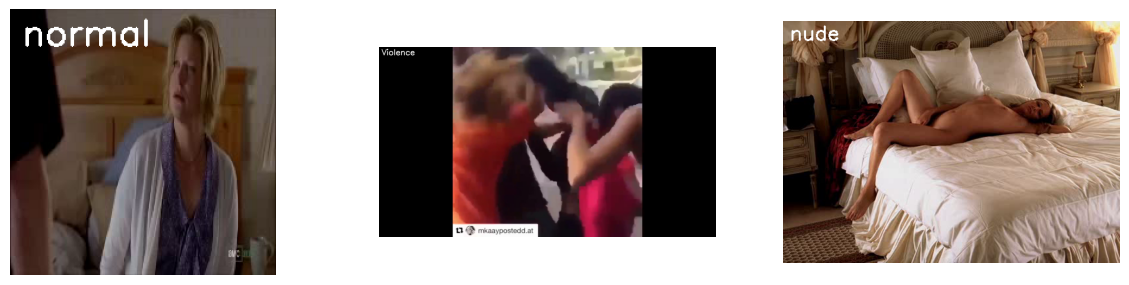

In [53]:
plt.figure(figsize = (20, 20))
 
# Get the names of all classes/categories in UCF50.
all_classes_names = os.listdir('dataset')
 
# Generate a list of 20 random values. The values will be between 0-50, 
# where 50 is the total number of class in the dataset. 
random_range = random.sample(range(len(all_classes_names)), 3)
 
# Iterating through all the generated random values.
for counter, random_index in enumerate(random_range, 1):
 
    # Retrieve a Class Name using the Random Index.
    selected_class_Name = all_classes_names[random_index]
 
    # Retrieve the list of all the video files present in the randomly selected Class Directory.
    video_files_names_list = os.listdir(f'dataset/{selected_class_Name}')
 
    # Randomly select a video file from the list retrieved from the randomly selected Class Directory.
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Initialize a VideoCapture object to read from the video File.
    video_reader = cv2.VideoCapture(f'dataset/{selected_class_Name}/{selected_video_file_name}')
    
    # Read the first frame of the video file.
    _, bgr_frame = video_reader.read()
 
    # Release the VideoCapture object. 
    video_reader.release()
 
    # Convert the frame from BGR into RGB format. 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Write the class name on the video frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
    
    # Display the frame.
    plt.subplot(5, 4, counter);plt.imshow(rgb_frame);plt.axis('off')

In [54]:
IMAGE_HEIGHT , IMAGE_WIDTH = 64, 64
 
# Specify the number of frames of a video that will be fed to the model as one sequence.
SEQUENCE_LENGTH = 20
 
# Specify the directory containing the UCF50 dataset. 
DATASET_DIR = "dataset"
 
# Specify the list containing the names of the classes used for training. Feel free to choose any set of classes.
CLASSES_LIST = ["normal", "nude", "Violence"]

In [55]:
def frames_extraction(video_path):
    '''
    This function will extract the required frames from a video after resizing and normalizing them.
    Args:
        video_path: The path of the video in the disk, whose frames are to be extracted.
    Returns:
        frames_list: A list containing the resized and normalized frames of the video.
    '''
 
    # Declare a list to store video frames.
    frames_list = []
    
    # Read the Video File using the VideoCapture object.
    video_reader = cv2.VideoCapture(video_path)
 
    # Get the total number of frames in the video.
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
 
    # Calculate the the interval after which frames will be added to the list.
    skip_frames_window = max(int(video_frames_count/SEQUENCE_LENGTH), 1)
 
    # Iterate through the Video Frames.
    for frame_counter in range(SEQUENCE_LENGTH):
 
        # Set the current frame position of the video.
        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)
 
        # Reading the frame from the video. 
        success, frame = video_reader.read() 
 
        # Check if Video frame is not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed height and width.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
        
        # Append the normalized frame into the frames list
        frames_list.append(normalized_frame)
    
    # Release the VideoCapture object. 
    video_reader.release()
 
    # Return the frames list.
    return frames_list

In [56]:
def create_dataset():
    '''
    This function will extract the data of the selected classes and create the required dataset.
    Returns:
        features:          A list containing the extracted frames of the videos.
        labels:            A list containing the indexes of the classes associated with the videos.
        video_files_paths: A list containing the paths of the videos in the disk.
    '''
 
    # Declared Empty Lists to store the features, labels and video file path values.
    features = []
    labels = []
    video_files_paths = []
    
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(CLASSES_LIST):
        
        # Display the name of the class whose data is being extracted.
        print(f'Extracting Data of Class: {class_name}')
        
        # Get the list of video files present in the specific class name directory.
        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))
        
        # Iterate through all the files present in the files list.
        for file_name in files_list:
            
            # Get the complete video path.
            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)
 
            # Extract the frames of the video file.
            frames = frames_extraction(video_file_path)
 
            # Check if the extracted frames are equal to the SEQUENCE_LENGTH specified above.
            # So ignore the vides having frames less than the SEQUENCE_LENGTH.
            if len(frames) == SEQUENCE_LENGTH:
 
                # Append the data to their repective lists.
                features.append(frames)
                labels.append(class_index)
                video_files_paths.append(video_file_path)
 
    # Converting the list to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
    
    # Return the frames, class index, and video file path.
    return features, labels, video_files_paths

In [57]:
features, labels, video_files_paths = create_dataset()

Extracting Data of Class: normal


[mp3float @ 0x3f9e6580] Header missing
[mp3float @ 0x3f9e6580] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x3f9e6580] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x2f8430c0] Header missing
[mp3float @ 0x3f9e6580] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x2f8430c0] Header missing
[mp3float @ 0x2f8430c0] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] H

Extracting Data of Class: nude


[mp3float @ 0x2f8430c0] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x3015ec80] Header missing
[mp3float @ 0x2f8430c0] Header missing
[mp3float @ 0x40e6b000] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x404b4900] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x3a2bef80] Header missing
[mp3float @ 0x3a2bef80] H

Extracting Data of Class: Violence


In [58]:
one_hot_encoded_labels = to_categorical(labels)

In [59]:
features_train, features_test, labels_train, labels_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True, random_state = seed_constant)

In [60]:
def create_convlstm_model():
    '''
    This function will construct the required convlstm model.
    Returns:
        model: It is the required constructed convlstm model.
    '''
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                      IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                         recurrent_dropout=0.2, return_sequences=True))
    
    model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
    #model.add(TimeDistributed(Dropout(0.2)))
    
    model.add(Flatten()) 
    
    model.add(Dense(len(CLASSES_LIST), activation = "softmax"))
    
    ########################################################################################################################
     
    # Display the models summary.
    model.summary()
    
    # Return the constructed convlstm model.
    return model


In [61]:
# Construct the required convlstm model.
convlstm_model = create_convlstm_model()
 
# Display the success message. 
print("Model Created Successfully!")

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d_4 (ConvLSTM2D)  (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d_4 (MaxPooling  (None, 20, 31, 31, 4)    0         
 3D)                                                             
                                                                 
 time_distributed_15 (TimeDi  (None, 20, 31, 31, 4)    0         
 stributed)                                                      
                                                                 
 conv_lstm2d_5 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_5 (MaxPooling  (None, 20, 15, 15, 8)    0         
 3D)                                                             
                                                      

In [62]:
plot_model(convlstm_model, to_file = 'convlstm_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [73]:
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics values to the model
convlstm_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start training the model.
convlstm_model_training_history = convlstm_model.fit(x = features_train, y = labels_train, epochs = 10, batch_size = 4,shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

2022-11-10 01:00:12.406259: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 1284833280 exceeds 10% of free system memory.


Epoch 1/10
327/327 [==============================] - 70s 200ms/step - loss: 0.2346 - accuracy: 0.9005 - val_loss: 0.7008 - val_accuracy: 0.7890
Epoch 2/10
327/327 [==============================] - 64s 195ms/step - loss: 0.1924 - accuracy: 0.9243 - val_loss: 0.7796 - val_accuracy: 0.7431
Epoch 3/10
327/327 [==============================] - 63s 193ms/step - loss: 0.1807 - accuracy: 0.9281 - val_loss: 0.7130 - val_accuracy: 0.7890
Epoch 4/10
327/327 [==============================] - 63s 193ms/step - loss: 0.1602 - accuracy: 0.9388 - val_loss: 0.7276 - val_accuracy: 0.8043
Epoch 5/10
327/327 [==============================] - 64s 194ms/step - loss: 0.1434 - accuracy: 0.9441 - val_loss: 0.8273 - val_accuracy: 0.7645
Epoch 6/10
327/327 [==============================] - 63s 193ms/step - loss: 0.1316 - accuracy: 0.9556 - val_loss: 0.8171 - val_accuracy: 0.7859
Epoch 7/10
327/327 [==============================] - 63s 194ms/step - loss: 0.1311 - accuracy: 0.9510 - val_loss: 0.7366 - val_ac

In [74]:
model_evaluation_history = convlstm_model.evaluate(features_test, labels_test)

18/18 [==============================] - 2s 102ms/step - loss: 0.8053 - accuracy: 0.8165


In [75]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
 
# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
 
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'convlstm_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
 
# Save your Model.
convlstm_model.save(model_file_name)

In [76]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation 
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''
    
    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
    
    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))
 
    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
 
    # Add title to the plot.
    plt.title(str(plot_name))
 
    # Add legend to the plot.
    plt.legend()

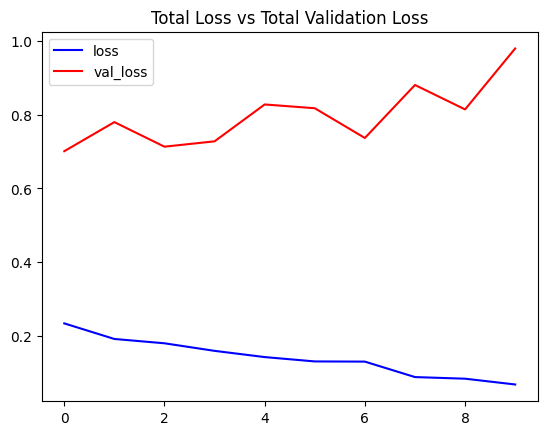

In [77]:
plot_metric(convlstm_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

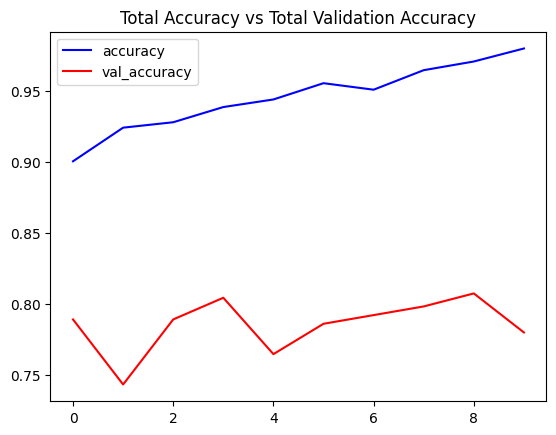

In [78]:
plot_metric(convlstm_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy') 

In [79]:
def create_LRCN_model():
    '''
    This function will construct the required LRCN model.
    Returns:
        model: It is the required constructed LRCN model.
    '''
 
    # We will use a Sequential model for model construction.
    model = Sequential()
    
    # Define the Model Architecture.
    ########################################################################################################################
    
    model.add(TimeDistributed(Conv2D(16, (3, 3), padding='same',activation = 'relu'),
                              input_shape = (SEQUENCE_LENGTH, IMAGE_HEIGHT, IMAGE_WIDTH, 3)))
    
    model.add(TimeDistributed(MaxPooling2D((4, 4)))) 
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(32, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((4, 4))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    model.add(TimeDistributed(Dropout(0.25)))
    
    model.add(TimeDistributed(Conv2D(64, (3, 3), padding='same',activation = 'relu')))
    model.add(TimeDistributed(MaxPooling2D((2, 2))))
    #model.add(TimeDistributed(Dropout(0.25)))
                                      
    model.add(TimeDistributed(Flatten()))
                                      
    model.add(LSTM(32))
                                      
    model.add(Dense(len(CLASSES_LIST), activation = 'softmax'))
 
    ########################################################################################################################
 
    # Display the models summary.
    model.summary()
    
    # Return the constructed LRCN model.
    return model

In [80]:
# Construct the required LRCN model.
LRCN_model = create_LRCN_model()
 
# Display the success message.
print("Model Created Successfully!")

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_30 (TimeDi  (None, 20, 64, 64, 16)   448       
 stributed)                                                      
                                                                 
 time_distributed_31 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_32 (TimeDi  (None, 20, 16, 16, 16)   0         
 stributed)                                                      
                                                                 
 time_distributed_33 (TimeDi  (None, 20, 16, 16, 32)   4640      
 stributed)                                                      
                                                                 
 time_distributed_34 (TimeDi  (None, 20, 4, 4, 32)    

In [81]:
plot_model(LRCN_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [82]:
# Create an Instance of Early Stopping Callback.
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Compile the model and specify loss function, optimizer and metrics to the model.
LRCN_model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])

# Start training the model.
LRCN_model_training_history = LRCN_model.fit(x = features_train, y = labels_train, epochs = 70, batch_size = 4 , shuffle = True, validation_split = 0.2, callbacks = [early_stopping_callback])

Epoch 1/70
327/327 [==============================] - 4s 9ms/step - loss: 0.8317 - accuracy: 0.4935 - val_loss: 0.8203 - val_accuracy: 0.5229
Epoch 2/70
327/327 [==============================] - 3s 8ms/step - loss: 0.8024 - accuracy: 0.5218 - val_loss: 0.7722 - val_accuracy: 0.5933
Epoch 3/70
327/327 [==============================] - 7s 21ms/step - loss: 0.7758 - accuracy: 0.5792 - val_loss: 0.9772 - val_accuracy: 0.4801
Epoch 4/70
327/327 [==============================] - 10s 32ms/step - loss: 0.7300 - accuracy: 0.6259 - val_loss: 0.7264 - val_accuracy: 0.7095
Epoch 5/70
327/327 [==============================] - 10s 31ms/step - loss: 0.6793 - accuracy: 0.6656 - val_loss: 0.7142 - val_accuracy: 0.6606
Epoch 6/70
327/327 [==============================] - 10s 29ms/step - loss: 0.6121 - accuracy: 0.7207 - val_loss: 0.6024 - val_accuracy: 0.7278
Epoch 7/70
327/327 [==============================] - 9s 28ms/step - loss: 0.5485 - accuracy: 0.7628 - val_loss: 0.5976 - val_accuracy: 0.758

In [83]:
model_evaluation_history = LRCN_model.evaluate(features_test, labels_test)

18/18 [==============================] - 0s 12ms/step - loss: 0.4540 - accuracy: 0.8147


In [84]:
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
 
# Define the string date format.
# Get the current Date and Time in a DateTime Object.
# Convert the DateTime object to string according to the style mentioned in date_time_format string.
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
    
# Define a useful name for our model to make it easy for us while navigating through multiple saved models.
model_file_name = f'LRCN_model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'
 
# Save the Model.
LRCN_model.save(model_file_name)

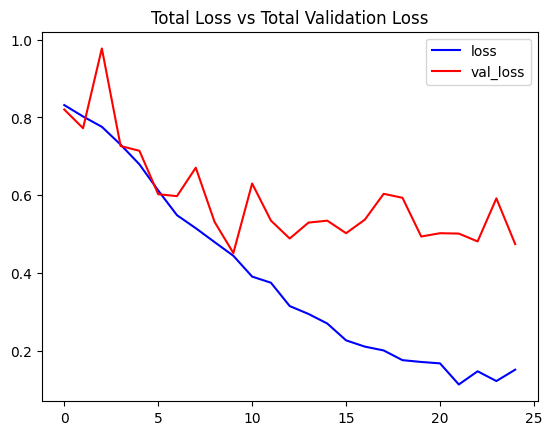

In [85]:
plot_metric(LRCN_model_training_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

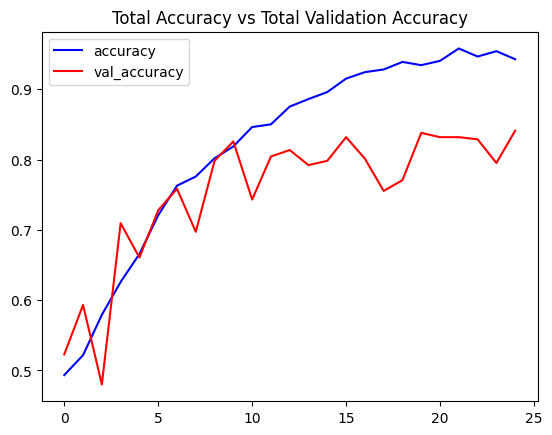

In [86]:
plot_metric(LRCN_model_training_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [87]:
def download_youtube_videos(youtube_video_url, output_directory):
     '''
    This function downloads the youtube video whose URL is passed to it as an argument.
    Args:
        youtube_video_url: URL of the video that is required to be downloaded.
        output_directory:  The directory path to which the video needs to be stored after downloading.
    Returns:
        title: The title of the downloaded youtube video.
    '''
 
     # Create a video object which contains useful information about the video.
     video = pafy.new(youtube_video_url)
 
     # Retrieve the title of the video.
     title = video.title
 
     # Get the best available quality object for the video.
     video_best = video.getbest()
 
     # Construct the output file path.
     output_file_path = f'{output_directory}/{title}.mp4'
 
     # Download the youtube video at the best available quality and store it to the contructed path.
     video_best.download(filepath = output_file_path, quiet = True)
 
     # Return the video title.
     return title

In [100]:
# Make the Output directory if it does not exist
test_videos_directory = 'test_videos'
os.makedirs(test_videos_directory, exist_ok = True)
 
# Download a YouTube Video.
#video_title = download_youtube_videos('https://www.youtube.com/watch?v=8u0qjmHIOcE', test_videos_directory)
video_title = 'videoplayback'
# Get the YouTube Video's path we just downloaded.
input_video_file_path = f'{test_videos_directory}/videoplayback1.mp4'

In [101]:
def predict_on_video(video_file_path, output_file_path, SEQUENCE_LENGTH):
    '''# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
 
# Perform Action Recognition on the Test Video.
predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
 
# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()
    This function will perform action recognition on a video using the LRCN model.
    Args:
    video_file_path:  The path of the video stored in the disk on which the action recognition is to be performed.
    output_file_path: The path where the ouput video with the predicted action being performed overlayed will be stored.
    SEQUENCE_LENGTH:  The fixed number of frames of a video that can be passed to the model as one sequence.
    '''
 
    # Initialize the VideoCapture object to read from the video file.
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Get the width and height of the video.
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Initialize the VideoWriter Object to store the output video in the disk.
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 
                                   video_reader.get(cv2.CAP_PROP_FPS), (original_video_width, original_video_height))
 
    # Declare a queue to store video frames.
    frames_queue = deque(maxlen = SEQUENCE_LENGTH)
 
    # Initialize a variable to store the predicted action being performed in the video.
    predicted_class_name = ''
 
    # Iterate until the video is accessed successfully.
    while video_reader.isOpened():
 
        # Read the frame.
        ok, frame = video_reader.read() 
        
        # Check if frame is not read properly then break the loop.
        if not ok:
            break
 
        # Resize the Frame to fixed Dimensions.
        resized_frame = cv2.resize(frame, (IMAGE_HEIGHT, IMAGE_WIDTH))
        
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1.
        normalized_frame = resized_frame / 255
 
        # Appending the pre-processed frame into the frames list.
        frames_queue.append(normalized_frame)
 
        # Check if the number of frames in the queue are equal to the fixed sequence length.
        if len(frames_queue) == SEQUENCE_LENGTH:
 
            # Pass the normalized frames to the model and get the predicted probabilities.
            predicted_labels_probabilities = LRCN_model.predict(np.expand_dims(frames_queue, axis = 0))[0]
 
            # Get the index of class with highest probability.
            predicted_label = np.argmax(predicted_labels_probabilities)
 
            # Get the class name using the retrieved index.
            predicted_class_name = CLASSES_LIST[predicted_label]
 
        # Write predicted class name on top of the frame.
        cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
 
        # Write The frame into the disk using the VideoWriter Object.
        video_writer.write(frame)
        
    # Release the VideoCapture and VideoWriter objects.
    video_reader.release()
    video_writer.release()

In [102]:
# Construct the output video path.
output_video_file_path = f'{test_videos_directory}/{video_title}-Output-SeqLen{SEQUENCE_LENGTH}.mp4'
 
# Perform Action Recognition on the Test Video.
predict_on_video(input_video_file_path, output_video_file_path, SEQUENCE_LENGTH)
 
# Display the output video.
VideoFileClip(output_video_file_path, audio=False, target_resolution=(300,None)).ipython_display()

OpenCV: FFMPEG: tag 0x5634504d/'MP4V' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


                                                                                

1/1 [==============================] - 0s 12ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


1/1 [==============================] - 0s 11ms/step


                                                                                
                                                                             


t:   0%|                           | 2/727 [02:01<12:12:33, 60.63s/it, now=None]


                                                                                
                                                                             


t:   0%|                           | 2/727 [02:01<12:12:35, 60.63s/it, now=None]


t:   0%|                            | 2/727 [00:36<3:40:39, 18.26s/it, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4





t:   0%|                                      | 0/727 [00:00<?, ?it/s, now=None]

OSError: [Errno 32] Broken pipe

MoviePy error: FFMPEG encountered the following error while writing file __temp__.mp4:

 b"Unknown encoder 'libx264'\n"

The video export failed because FFMPEG didn't find the specified codec for video encoding (libx264). Please install this codec or change the codec when calling write_videofile. For instance:
  >>> clip.write_videofile('myvid.webm', codec='libvpx')